In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import gmaps
data_df = pd.read_csv('mapable.csv')
data_df['kpd']=data_df['points']/data_df['price'] 
data_df.sort_values(by='kpd', inplace=True)
data_df.tail(40)

,id,country,points,price,category,province,variety,lat,long,kpd
185073,51514,US,85,5,white,California,Chardonnay,37.090240,-95.712891,17.00
30822,33803,US,85,5,white,California,Chardonnay,37.090240,-95.712891,17.00
116909,129109,Spain,85,5,red,Northern Spain,Syrah,40.463667,-3.749220,17.00
43521,47910,Germany,86,5,white,Mosel,Riesling,51.165691,10.451526,17.20
140170,3167,Italy,86,5,white,Veneto,Glera,41.871940,12.567380,17.20
201887,69658,US,86,5,red,California,Merlot,37.090240,-95.712891,17.20
234362,104412,US,87,5,white,California,Sparkling Blend,37.090240,-95.712891,17.40
194831,62072,Chile,87,5,white,Aconcagua Valley,Sauvignon Blanc,-35.675147,-71.542969,17.40
160005,24592,Chile,87,5,white,Aconcagua Valley,Sauvignon Blanc,-35.675147,-71.542969,17.40
131913,145389,US,90,5,red,California,Syrah,37.090240,-95.712891,18.00


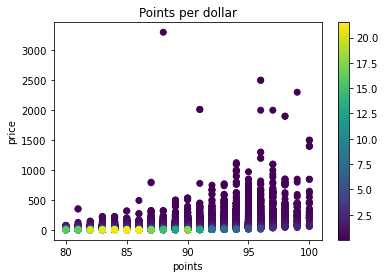

In [50]:
plt.title('Price per point')
plt.xlabel('points')
plt.ylabel('price')
plt.scatter(data_df['points'], data_df['price'], c=data_df["kpd"], cmap='viridis')
plt.colorbar()

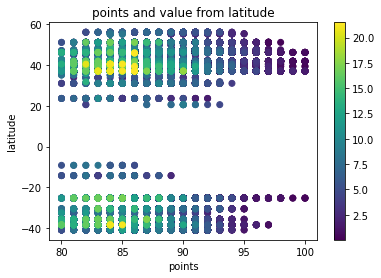

In [51]:
plt.title('points and value from latitude')
plt.xlabel('points')
plt.ylabel('latitude')
plt.scatter(data_df['points'], data_df['lat'], c=data_df["kpd"], cmap='viridis')
plt.colorbar()

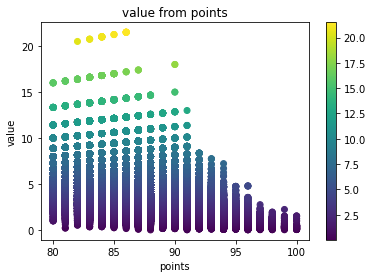

In [52]:
plt.title('value from points')
plt.xlabel('points')
plt.ylabel('value')
plt.scatter(data_df['points'], data_df['kpd'], c=data_df["kpd"], cmap='viridis')
plt.colorbar()

In [94]:
pull_df = pd.read_csv('updated_winery_dataset_categorized.csv')
records = pull_df[pull_df['id'] == 145389] 
records

,id,country,description,points,price,province,variety,winery,category
131926,145389,US,"This Châteauneuf-style wine is jammy, with bla...",90,5,California,Syrah,Fusée,red


In [90]:
records = pull_df[pull_df['id'] == 15429] 
records

,id,country,description,points,price,province,variety,winery,category
14482,15429,US,"This Châteauneuf-style wine is jammy, with bla...",90,5,California,Syrah,Fusée,red
151580,15429,Chile,Peachy aromas come with mellow notes of oak an...,90,35,Casablanca Valley,Chardonnay,Cono Sur,white


In [58]:
#grouped_df=data_df.groupby('country').agg({'points': 'mean', 'price': 'mean', 'kpd': 'mean', 'lat': 'min', 'long': 'min', 'variety':'count'})
grouped_df=data_df
# Store latitude and longitude in locations
locations = grouped_df[["lat", "long"]]
# Fill NaN values and convert to float
rating = grouped_df["points"].astype(float)
# Plot Heatmap
fig = gmaps.figure()
# Create heat layer
# Add layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [97]:
good_df = data_df[data_df.points > 97]
locations = good_df[["lat", "long"]]
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations,  
                                 dissipating=False, max_intensity=100,
                                 point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))